# RGB Color Model

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, axes3d
import numpy as np
import random

We are going to jerryrig a color cube by creating 6 planes from the color cube from randomly sampled points. If we have enough points, then they will have the appearance of a surface when we make the size of the markers big enough.

(-10, 265)

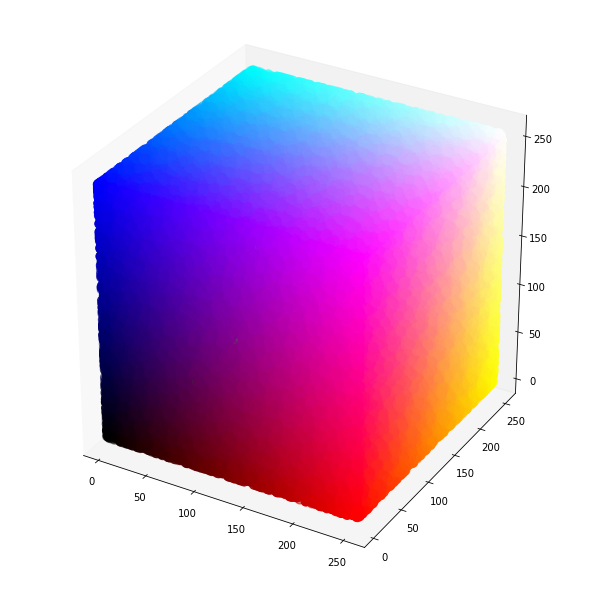

In [49]:
n = 10000
RGBlist = {}
paleta = {}

RGBlist[0] = [(random.randint(0,255), random.randint(0,255), 0) for i in range(n)] # bottom wall
RGBlist[1] = [(0, random.randint(0,255), random.randint(0,255)) for i in range(n)] #back wall
RGBlist[2] = [(random.randint(0,255), 255, random.randint(0,255)) for i in range(n)] #back wall
RGBlist[3] = [(255, random.randint(0,255), random.randint(0,255)) for i in range(n)] #front wall
RGBlist[4] = [(random.randint(0,255), 0, random.randint(0,255)) for i in range(n)] #front wall
RGBlist[5] = [(random.randint(0,255), random.randint(0,255), 255) for i in range(n)] # top wall

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

for key, value in RGBlist.items():
    paleta[key]=list(zip(*RGBlist[key]))
    ax.scatter(paleta[key][0],paleta[key][1],paleta[key][2], c=[(r[0] / 255., r[1] / 255., r[2] / 255.) for r in value], s=90)

ax.grid(False)
ax.set_xlim([-10, 265])
ax.set_ylim([-10, 265])
ax.set_zlim([-10, 265])
#ax.set_title('grid on')

(-10, 265)

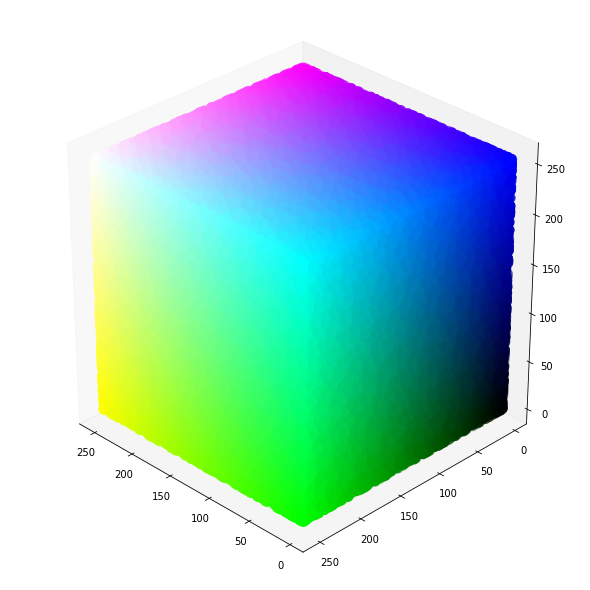

In [55]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

for key in [0, 3, 4, 1, 2, 5]:
    paleta[key]=list(zip(*RGBlist[key]))
    ax.scatter(paleta[key][0],paleta[key][1],paleta[key][2], c=[(r[0] / 255., r[1] / 255., r[2] / 255.) for r in RGBlist[key]], s=90)

ax.grid(False)
ax.view_init(30, -225)
ax.set_xlim([-10, 265])
ax.set_ylim([-10, 265])
ax.set_zlim([-10, 265])

Let's try breaking an image down into its composite RGB components. We'll start with Chelsea the cat.

In [56]:
from skimage import data

(-0.5, 450.5, 299.5, -0.5)

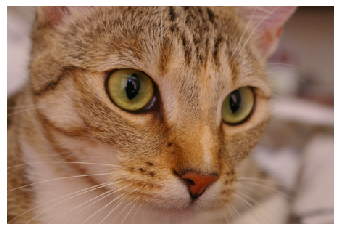

In [57]:
im = data.chelsea()

plt.imshow(im)
plt.axis('off')

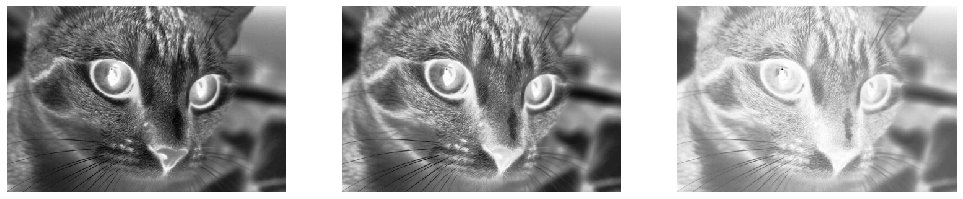

In [64]:
fig, axes = plt.subplots(ncols=3, figsize=(17, 4))
colors = ['Reds', 'Greens', 'Blues']

for i, ax in enumerate(axes):
    
    #ax.imshow(im[:, :, i], cmap=colors[i])
    ax.imshow(im[:, :, i], cmap='Greys')
    ax.axis('off')

Note that using our 8-bit system, we are able to represent a total of $(2^8)^3 = 16,777,216$ possible colors. That is a large space! Computers are pretty powerful these days, and can represent most of these colors. But there is a subset of 256 colors known as **safe colors** that can be reproduced by any system. Forty of these are processed differently on different machines, so that leave 216 colors, the de fact standard of safe colors. 

For this subset, we still use the RGB tuple notation, but the only values that can be taken are 0, 51, 102, 153, 204, or 255. This gives a total of $6^3 = 216$ possible colors.

Perhaps you have heard of the **hexidecimal system** for expressing colors? It expresses the same information in the RGB system, but uses a base-16 number (0,1,2,3,4,5,6,7,8,9,A,B,C,D,E,F) giving a unique string for each color.

For instance, 

$$(0,0)_{16} = (0)_{10} = (00000000)_2$$

and

$$(F,F)_{16} = (255)_{10} = (11111111)_2 $$

Thus, a grouping of two hex numbers represents an 8-bit byte. Six hex numbers can be used to represent any color in the RGB spectrum.

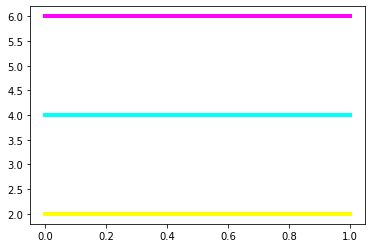

In [83]:
x = np.linspace(0,1)
y = np.linspace(1,1)
w=4

fig, ax = plt.subplots()

ax.plot(x, 2*y, c='#ffff00', linewidth=w)
ax.plot(x, 4*y, c='#00ffff', linewidth=w)
ax.plot(x, 6*y, c='#ff00ff', linewidth=w)

# HSI Color Model

Let's try expressing the cat in terms of HSI

In [19]:
from skimage.color import rgb2hsv, hsv2rgb
from skimage.util import img_as_float

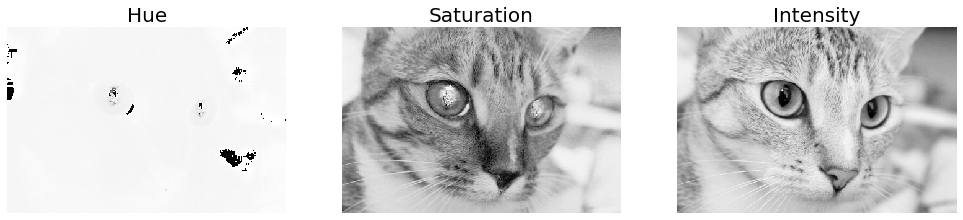

In [119]:
im_h = rgb2hsv(im)
im_h[:, :, 2] = 1 - im_h[:, :, 2]

fig, axes = plt.subplots(ncols=3, figsize=(17, 4))
#colors = ['Reds', 'Greens', 'Blues']
labels = ['Hue', 'Saturation', 'Intensity']

for i, ax in enumerate(axes):
    
    #ax.imshow(im[:, :, i], cmap=colors[i])
    ax.imshow(im_h[:, :, i], cmap='Greys')
    ax.set_title(labels[i], fontsize=20)
    ax.axis('off')

To change the individual color of any region in the RGB image, we change the values of the corresponding region in the in the hue image. Then we convert the new H image, along with the unchanged S and I images, back to RGB.

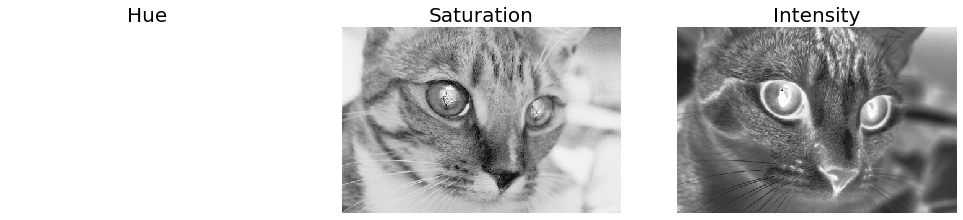

In [154]:
im_h = rgb2hsv(im)

im_h[im_h[:, :, 0] < 1, 0] = 0.8

fig, axes = plt.subplots(ncols=3, figsize=(17, 4))
#colors = ['Reds', 'Greens', 'Blues']
labels = ['Hue', 'Saturation', 'Intensity']

for i, ax in enumerate(axes):
    
    #ax.imshow(im[:, :, i], cmap=colors[i])
    ax.imshow(im_h[:, :, i], cmap='Greys')
    ax.set_title(labels[i], fontsize=20)
    ax.axis('off')

(-0.5, 450.5, 299.5, -0.5)

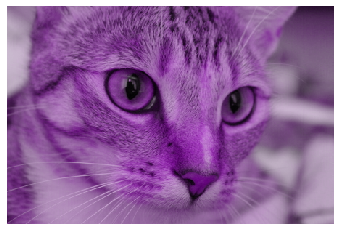

In [155]:
im_back = hsv2rgb(im_h)

plt.imshow(im_back)
plt.axis('off')

In [122]:
im_h = rgb2hsv(im)

im_h[im_h[:, :, 0] < 1, 0] = 0.8

fig, axes = plt.subplots(ncols=3, figsize=(17, 4))
#colors = ['Reds', 'Greens', 'Blues']
labels = ['Hue', 'Saturation', 'Intensity']

for i, ax in enumerate(axes):
    
    #ax.imshow(im[:, :, i], cmap=colors[i])
    ax.imshow(im_h[:, :, i], cmap='Greys')
    ax.set_title(labels[i], fontsize=20)
    ax.axis('off')

array([[0.06837607, 0.06837607, 0.06837607, ..., 0.07291667, 0.07291667,
        0.07291667],
       [0.06837607, 0.06837607, 0.06837607, ..., 0.08080808, 0.08333333,
        0.08080808],
       [0.06481481, 0.06481481, 0.05855856, ..., 0.05913978, 0.05913978,
        0.05913978],
       ...,
       [0.07526882, 0.07526882, 0.07377049, ..., 0.03431373, 0.03431373,
        0.03431373],
       [0.07843137, 0.07843137, 0.07380952, ..., 0.04901961, 0.04901961,
        0.04901961],
       [0.07843137, 0.07380952, 0.07638889, ..., 0.04901961, 0.04901961,
        0.04901961]])

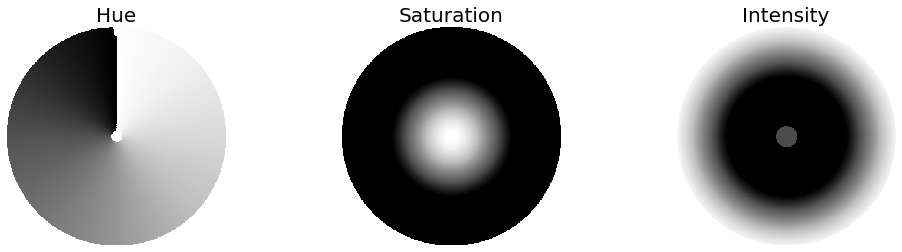

In [190]:
im = data.colorwheel()
im_h = rgb2hsv(im)

# Blue and Green to Red
# im_h[(im_h[:, :, 0] < 9/12) & (im_h[:, :, 0] > 7/12), 0] = 0
# im_h[(im_h[:, :, 0] < 5/12) & (im_h[:, :, 0] > 3/12), 0] = 0

# Reduce the saturation of the cyan region by half
#im_h[(im_h[:, :, 0] < 7/12) & (im_h[:, :, 0] > 5/12), 1] = im_h[(im_h[:, :, 0] < 7/12) & (im_h[:, :, 0] > 5/12), 1]/2

# Reduce the intensity of the central white region by half
im_h[(im_h[:, :, 1] < 0.1), 2] = im_h[(im_h[:, :, 1] < 0.1), 2]/1.3



fig, axes = plt.subplots(ncols=3, figsize=(17, 4))
#colors = ['Reds', 'Greens', 'Blues']
labels = ['Hue', 'Saturation', 'Intensity']

for i, ax in enumerate(axes):
    
    #ax.imshow(im[:, :, i], cmap=colors[i])
    ax.imshow(im_h[:, :, i], cmap='Greys')
    ax.set_title(labels[i], fontsize=20)
    ax.axis('off')

(-0.5, 370.5, 369.5, -0.5)

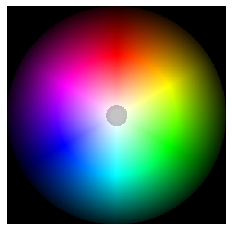

In [191]:
im_back = hsv2rgb(im_h)

plt.imshow(im_back)
plt.axis('off')

# Basics of Full-Color Image Processing

Full-color image processing falls into two categories: (1) we process each image component individually and then form a composite processed color image from the individually processed components (2) we work with color pixels directly. In color systems, color pixels are really vectors.

The first set of transforms we will look at are **color transforms** or **color mapping functions** that map one color to another. Kind of what we did simplistically with Chelsea the cat. Mathematically:

$$s_i = T_i(r_1, r_2, ..., r_n), \ \ \ i=1, 2,..., n $$

where n is the number of components of the color image, 3 for HSI or RGB. Some transformations are more easily performed in one color space versus another. For instance, if we wish to modify the intensity of the image in the HSI colorspace this becomes:

$$s_3 = kr_3 $$

Only the I component is modified. These simple transformations are the ones we performed above. But in the RGB color space all three components must be modified:

$$s_1 = kr_1, \ \ \ i=1,2,3 $$

While the transformation itself is easier in the HSI space, the image transformation to the HSI space is actually more computationally expensive.

# Color Complements

The hues directly opposite each other on the color circle are called **complements**. We are interested in them as they are analogous to gray-scale negatives of an image. This is most easily performed in the RGB space with the function:

$$s_i = 1 - r_i, \ \ i=1,2,3 $$

(-0.5, 450.5, 299.5, -0.5)

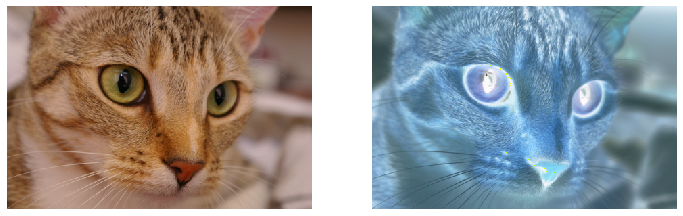

In [193]:
im = data.chelsea()
im_i = 1 - im

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

axes[0].imshow(im)
axes[0].axis('off')

axes[1].imshow(im_i)
axes[1].axis('off')

Reds in the original image are replaced by cyans in the new colorscale. 

# Color Slicing

Highlighting a specific range of colors in an image is useful for separating objects from their surroundings. The basic idea is to (1) display the colors of interest so that they stand out from the background or (2) use the region defined by the colors as a mask for further processing. 

The simplest way to slice a color image is to map the colors outside the range of interest to a non-prominent neutral color. If the colors are enclosed by a cube of width W and centered at an average color, then the necessary transformations are:

$$ s_i = \begin{cases}
    0.5,& \text{if } [\mid r_j - a_j \mid > \frac{W}{2}]_{\text{any } 1 \le j \le n}  \\
    r_i,              & \text{otherwise} \end{cases} $$

In [2]:
import urllib

In [66]:
f = urllib.request.urlopen("data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUSEhMVFRUVFxUXFRUXFxUXFRUVFxUWFxUWFhUYHSggGBolHRcXIjEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGBAQGy0dHyUtLS0tLS0tLS0tLS0tNS0tLi0tLS0tLS0tLS0tLTUtLS0rLS0tLS0tLS0tLS0tLS0tLf/AABEIAMIBAwMBIgACEQEDEQH/xAAcAAAABwEBAAAAAAAAAAAAAAAAAQIDBAUGBwj/xAA/EAABAwIDBAcGBQIFBQEAAAABAAIRAyEEMUEFElFhBiIycYGRsQcTocHR8BRCUoLhYnIVIzOSskNTosLxY//EABoBAAMBAQEBAAAAAAAAAAAAAAABAgMEBQb/xAAoEQACAgEDAwMEAwAAAAAAAAAAAQIRAwQSIQUTMSJBUTJxkaEUYdH/2gAMAwEAAhEDEQA/AJFIJ4pFMI6pgLQTIzzdABJCUFSEw0tIaUtDBAAQQlAIBiAplPJRYUtgshiQl6QUqoUgpDEyjSUpAgbqFCUpqPDOukyhYlAynSUjeRQrGnMJTbwQpEpquqEMF7kTqrkolN1CnQhbahRmoUhhSXFFDFe8KI1CmyUguRQDwcUohMNqJYeigCIRFqN7kkuQAbmo3UwQm3uS2vQAyEEl4uglyOi4YmsQU61MVFAxBySZRlEFaELpJbim5RMchgOBBCUECAwKYMlEBUubJDQ08pD0qpmkuQAhHKIlCUCHWpNA3KDUVA3KBkglEEEUIEGU1XKcUauUxMRCRURtckvTAU0pDijBSHFAwyminGtJyBPcJUmnsys7Kk8+BHqnYiuLk6wq0p9GcU78kd5AUyl0QxGpYPEn5JbkCKF6StHX6I1gLPaTwuFnq9NzCWuBBGYKE0MS7JEwoi6yMFAhRCCTvI0DLSVHcU8clHKzLCckhG5E1WiQyJSQ0hOsS0xCGo0SKUgFqSDZRJUlpskCCekvCNxREpDGyEYQJREpiFtKKjmUlhUnB4Cs9x3abo4xA8ygYAhKuMP0cqHtOa34lWFHo7SHaLnfAfBKxGVLk23DVH9ljndwPqt7Q2ZSb2abe8iT8VLDQBcgDyCNwjCYfo7iHfkDf7iPkp9Loi49uoB3CfVW1XpTg2u3TUnmGktzIsdcsxa4JsrbDYplRodTc1zTk5pBFjBuOanfZpLHKKtpooaHRGiO0Xu8Y9FY0Oj+HblTb439U9jNsUKRipVYw8CfXgpNKu1zQ5rg5rhIIMgg6gosW1pW0HSwrG5NA7gAnQwJG+jD0hDkBCUguTWIfAQA1UfdVO3dkNxDeFQdl3HkVP3kN5K6YzmGLoOY4seIINwkUyugbc2Q3EN4VAOq7jyPJYCrRdTcWPBa5tiCtlKyaC3kSQUEwLd5smJujrv0TLCoLFvKQ6q1t3EDP4JrF4gMa55yAn6BZvEYl9TM3JiBzEyQcrR4FZ5Mm3heTv0Gh/kNuXEV+y//AMapDMPynIccs81PwuMY/sunlkfI96wVVv8AU05xG9xjeFvhwR0cQWmWuiIjdPZDRBI3uXw1ss+8/c9DJ0vFJem0/wAm9Oaep4Kq7sscfCPVDoJ0npucMPXa1ryYp1CILzluPMRvHQjPLOJ6BK2WS/B4efBLDLbMxtDo/XOYDe8qfR6OO/M8DuC0Zckl6NxiVDOjrNXOPwT7Ng0f0k+JU33ik1TEFK2MgM2PRH/THqn2bNpaU2+SlsrBFVrQnyA3TwjBk1o8AjxFdjGl73Q1oklQsdtFlNpe90NaJP8AA1K5t0k2++uTMimILWDvAJcRncHNTJ0dGn08s0qXgc6T9NqlR5FFxZTb2QD1naS6DrexyTHRzptXpVWirUc+m4tDg47zsoBbMm2Z4rJViDx5ZDje90w6r9nmufc7s+g/jYVi2bf9PQVbaDWsL3PAYBvF023YmVzzpP0wdWPuaLtykc3A9Z94EiJAmLW7ys3V2zVdh6dFzjuMu28SLwJuTGXKVDoCTPOJ8T1gcwbBPJktUjn0PToxnuyc/Bd0G0zEt0b1r3duz/lwYLgRHC55IsPtqvht5tOo5rXBwLbjdM2nRrgHNvpxTTH3BgAi8ESRMwA2YJkTIyUbFMLrnPKAZAEnM3k73W7gudSaPZy4YzW1qxOPrE7zwZkk3u+834aZ2W39lG1y5tbDuJhhD2TnDiQ4DlIB8SsAyoRcHOCRJB7LiRNieGasOhm0RQ2hTvDaoNMy7V8ESDn1gPNb45eo8vX4n2Wn9ztdSuGgucQABJJMADiSsH0k9owbNPCCf/2OWs7jfmVn/aX0kc6t+Fa6GU91zwM3PImDpYEW4lYinV3jE3Nh5SJ8QFrOT8I8zSaWLSnPn+jRYrbtWs6XuLjnLiXcQCJyFjZKwu3K9NwqMquBAs2ZaR+ktvbkdOaoKdQk8O+LSYIPIGfNSN4xeOeczHVBt6LF2etGONxrajrvR3pZSxMMPUqRIaTZ39h17vVX/vFwTD1i0giJBkEnyJ+9V0bod0idXpllQzUp66uacj36LWE74Z5Or0fbW+Pg23vFA25sluJbaBVaOq7j/S7kipVlKpvWqPOZzWuwtcWuG64GCDmCgunPo0nHedTY4nMkCTogr3iowFXVTNn7ErVALbrf1Ot5DMrTYLZVKneN936jfyGis6bd430zU7hnMfaFg2YenRpNcXPqOc5x0DWAACOBc4X/AKVlHOvpZxO7+aGiCRxyWp9r1EjG05Fhh2bt7GKlUuA5/wALHB8ti5gO6ubh1pBadcvgFyzdys+p6atuBJfcdG9EAuPUGRiZdOWhySX0SeMFzwOy6xuXDlOuiDqkuNwCSJkXhosDNpFk255gDqajqk23s7qTqkqdiBUIiDBs4EEiDGc5gyB5cl3zYtf8RhqNcG9SmxzhweWjeHnK4Xs7Z1Wu8U6TS5x791oiA5x0bmZPhOS9B7B2W2hRZSHZYxgE6wIJjmtcZ43VpRaivcZdQco9TeGiun0uCg1nDJ1itTxKKmpXhWlB+/TBUHG04E5jmnNj1BBaPLvSvkaQH1N1NVMWIun8XTzCzO1axZKoVWZnpltoVKhpNJ3KeesvuCfAceay+IE3OhiYzItYDPv802yqXOJOpJPCSZ8TJ+JVgadpMzr3OBs0TYCdOHNck52z67R6eOPEqKo05mxsYMC8xERbhn3qNibZyDaZ77xbhqrmoLcm5wM6bt6ADxUHG0RuWFwSIIi9gI4iPvJFjyIOhdttJkjkNeIy+yp9FnCCQXC+U7w10N571X4CIMzBmCOTTNvEHwViDcyM9H2a4gjrD71UM6YUqZJp1DvFpDhwaYAjkTcR8U05hgGNRlYDrTIn80XyyUariNDIn9f6bzBN5PdlxUTfc4yQJJJgzvf0gk52y7u5JIqcx6tUDYk6NAFiOq42J4D6qqxFZwc1zRLmlrmht4IIIkd6tXvbFwHC97Td29nY8c+BVJjnPp1M9Oqb6CAJFwRyWsVycGrm+27RLr0quIr1KtUOYHuc8ki4GgDczYR4KxGDw7eqWl1wC5zyBAzPUMZQBIGsqow2IJGsCedrcTa8CQp0EdrMNvNxpugiM5i3Lkr3cnPhwpRXJIfhKbmyAQ4jeMEloLzDbmZ1OfJIfh7E2IGsETGcA5kweWYSqFWD2b/piJcCILgBJ538rBSH1mG4BBv1rRJM5wTbgBaYSbRtHHJexB3ZtInmBF93MRzPmrfodiN3FN1DmvaT4bw/4hVVYgHxESSRxJuBlCm9GTOJZBndDjP7Y+YUx+pFalLsTv4Z1PC1JVlSWfwT1dYepxXUfLE4FBNbyNFAB1QDL+SrjDsDY4R5yM1R4VgdUa05E/ImPktNSIFuCzux0Yf2pdHjXoNrUWudUoEndaC4upmN4DW0AwOBXHnUiAC8FrSTuuILQT/S45mdF6gmeQ+KbqUGvG6QC3UESDyhKUbPQ0vUJYI7as83t2XiN0O9xWLXNDmE0XuDheC0hsR8uS1PRr2c1a7G18Q73NN1xTDT70jQ3s2Txkx3rs1ZoMNGXLglOpgkN0F/okoJFZuqZcipLaU2ydgUcPRp0abA0A7x1JMRLnfmPNWrxdPNF0VQiYVnmttu2MtUXH4UOHoeB+in02Jt7LJokxmIrOYXMfpP8EJOyMVFUT+a3jp8fVaDbOzxVZwc3snhlIKxVRxY6DZzT8RkQolwUjaY5uqzG28LvtK1LXipSDxqAfqPUKpxNOQtE7EuDiW1sI6hUdvA7pMyPP1TX+Ikt3Q6QMuI5Tmuh9IcE1wO8FhP8JYHkgkjlPyWM8cfLPY0usztbIKxjD4xwtDpuBaQN7OW5HXzSnNqPuYbb9xk3sMtPJTW0QLd2eltZ0RVRIgRABMSIiBdttZ9OSydI9KMZyXq/RWtqe7G4TbiNYJse4n7hPnEsiHtJOhJggZROo7o+CZxrcwQJsDFzMTIB0PBUVeq5psTGiFG/BM9R2VT5RfOqh0NB3jILgSd0RIDbHLmnGt/KASLAi28XCxi06cFE2cyGS65IuYynK2mQ+5UxjCTkXRaA6LQSGjieKaRtGTaTfuOUjYGQNN60iREFk3AJHmOEKFiaQcN02kWzkE5uPjPgrX3JzmYBzE7oBI3Q79Q8PVRsZhyBOf5idXAXtwMET3oNMkVJUzP4bqug6ajllE6K6pPGpAIgmbSbkva7xED4Ktx7YAfeQADaBEC3ff4oqGItAMXGpAyzKLs48dQexlkzE7uguBeDoSLEGHC8qUMYSCDBsQOFm7uRuTHHgqhvP8Aq0E+Mp7e4ZZ8oIjukfVTJHZjyAx9eBncmCBPPP8AhanophWsbvFzTUfEhpB3QNLa8Vk3Om5k8CZM5ZcuKfYYy+4z/wDkrWDSPP1WOWbhOkdVwpVnQqLmWyOkb6cB5L2HxI/tMfA/Bb7Z2JDwHNMgiQeIW8ZKR4mfTzwv1F42pZBNNQVHOHgqRqVmt0HWPc2/0HitcIWV6Ohxrlw7IG6792UeS1W4sF4LHA8JcpDWtCN1RUArIIwIE6oNbFyhVbOduA4oEBghJczreA+aW0cc/RKA1R5AQzNIrmxSwmnDrSmxDBEyCsf0mwoguFnNE941C2lcQe9UW1GySeBH38UpeAXkgdDcdvNdSOY6ze49oed/FT8bRg8ishsqqaVaRmxxte4kgjyW8rtD2BzciJH0Sxy4oqSOf9OMM/3W+zQie7Vc/pPmMrHORED7yXZ8ZQDmlrhINiFybb2yDh6xES13ZnLu5205BGRe56fTcqT2P3G30SGk5nQyI6wvNjAy/jNI3S1ruqBAu2Da15+MXOWmSLCHenuNpIk2sIPIa6IsbiRYtiQAW2gbzbzOZ4C/84NHtSltVFJWdBuYPISYtF/kOCqMdn8sla13QYaZ7jcHJ3p3Ktr0HPdutE38vHuVxVHmam2qXkucO8EA6awL7pHWPl/yVph3NLbESASC0RuOAMlxtnaO7RUlPB1GACWkxa19D4/Y5InVagGgB0ymCc/5Ut0eljm6TkmaFtYC+7GsR2Sd7rEDMJyu+0SAHETq55JZ1mDh2slmTiXj8rT53GcGDkoFTajxYtGfP7hNJvwTm1eKHMr/AAWm0hIeBk4uiDAucr5gWR7O2MT1RJJi09x5aH4qBgqrnmXd8AWjM+i1Oz3C0WJBE3d1nS1sDkRflCmVx4M8Shml3KKHE4Z7Da5BysIjK4TNOo6INhIPEQZPWA8c1p8dRDhMGQL5CCDHWaNIkiPqqSthhqDpytPzjglF35NM2Jx5i+PgbYwRPfa0nKc+ypFNnHTMAC3e7jZN0zeL3O7cZtAnMa+KktFuIygZE8yNbcJsFVkQ5QzBE8b58OJjVbHoBipDqf6XSO50/Np81jsTUixIJOeXC085stp7OME6H1SD1jAnUNt6ytMf1HL1CUey0/JvmhBONaiXQfPEXY+0XUa+5ubzajgLdppE9YcRGY5ee3a4G6wOMqupVBVYA7dmxyIIg9y02w9rtr098NLbkESDBHMfRc0X7GhdiEe8EinTBE3TgDW3VgKb3IPcBzKbNYnLzRtAbc5piFsbqUHu0Cbc8nK3ojadBfiUWIDxdt+Z++9Jd2k7lcqPN5TqgE45wESqbGEbrnONs54CVZ4l8idBl3myoekVctpbjYmodyDHZIO8fQTzSb4AzOzGmo9z47RJjvK2Oz6waRRJuRI784+ardm4IUmSc9B8yqvFYuam8DdpsefFZxTRb5NNjqMGdD6qi2xs1lZha8SPiOYWgwGLbXpb1pycODgoVenFitvIk2nwcd29sSpQcSesw5P049bgVQVq1wby3Lu+vcu07SwwcCCAZzByK57tzo5Tkln+WeV2+LfooeL4PTx9QbVT/JjsS4Cb/myF+8g+AU/A09wC2cF05jjodAVAxOBqMeA4dWcwZHl5Kxoj7zOnDx81nJUd2lksjckOPuDI5mLTFjEnSP50SBQ1z1Lmw7u3m5BSqOEcSLHl1Q0k3iC7U5/cJ11NrRfdMS6RIO7JD94g9Z3ILN0epBcclbVokZgiAc2lvWvaR5hUu18NBB1sD5TBGhC0OJfAiNN0j+nOmDz1VPtJpLQSdR4nKSrhwcOujGWNoLA08rA3GvfEjitBgKk2M5CwP5XCJv8ApIVHgWxck21/SDFxzsrfCXAuOtLesJvIcMvFKQtN6UWUm54ubBb2jDjmOSg46kAXABrTJtJuAZkHIWm3LiFKdUkmDNzDhbcDm9o8RMpmtVAaeDpmM6jnNEkH8uXDVJHXJ8FKTBByyz58k5SqgM7yZgmAMhvDx+CRiBJPMm+hk6fFJ2dhzUcGg2tJ/KGzMH4J1ZxZcnbdljsHY7sRUAghoMudwHAcyF17ZeGbTY1jRAAAA5BZjYr6dJoZTExwHxWiw+JedI711RikjwNTllkl/RcAIKI1lU3E+RQVHMTtp7PNy0SOGqocBiKlGpLI3HEb7TppIOn8K02f0rbZmJG6cveAdU/3D8vp3K5rbPpVhvNgz+ZpFx6Fc+2+UWO4bFu5hSN82Jv3zCp8RTxVOPdtp1BrJLXxy0J8QpmGxDj/AKhI5fymBa+8daC0DW10trNbTzuq9mPpgluZHefil/j3aADvPyT4AsSzjf4In1QLCFXtrh3aqeGScGKptylx5Sf4TESjJuT9EyXTYZanj/CivrVHkWtw+vFOu3oud0fFAELHY/re7Ywu3c4y3uG9p3qtwmzi1zq1d+/UJJH6KTf0sB4WvAmJgKZi9pUqTbX9FkNr7UqV5HZZw49/LkpbBIe25t4OJZSM8X6dzfqs65x5qW3DJX4ZRZapEro1tQ0Kt+w+A7lwd4ei3WLo7wkeHMLnjMOtd0Zx8t9y83HYPEcPBVBikJqslZ3bWAkEhbDH4eLhVlanIghbok410gpFp8Uzs8AkCNL6fELf9JujfvWndz071zzEtfQO7UaWxrp4FYZYt+D1tBnjBU3ReVcaGzkOtIzdBADQW6A2VbisRvGZsNIAAkZgDWbquOLBvIlJdiAMyPvLmsFBnprVUOE3vzFrz/VPzVbtKoSWhoyzjuUwNqPtTY4nuORnKc1Mw/RfF1I3aVTwYfUrohH5PM1mqtbYldQfkRnplnOd/RWWExRbkQLAZCDAEX4x6q0wfsyxrzJpub3va30krT7M9lFb/qVGj/c6PG10pYxYteo/UjDPxYNzFo7IAAA7LXWyzEJAe9x6rbnKI3WiNOa7Bg/ZnQbd7yZzgNb8Rf4q7wvRbA0r7jSRq7rH4oWM0n1RVUUcIwexK9UgNYYjIAvPwELZbH6CYkx/l7nOo6T4NErptTauEo2G6I0EegVZi+mjRakwnnkPqqVRODLqZ5HbE7K6GlgHvKk9wDR81dswmGo3MTxzPmVkq3SDEVNd0cB9SmRVebkyl3EYU35Nmdq0tGyjWUbXfFkEdxBsFY3ZodoqZjMRhjvUHkDVhuw/t+i2VSnGaj1KIOaW1omyuwHTsjq12bp4xLfMXHktBhukFGoJEHm0grPYvY7XaKoqbEcwy2yLYHQfx9A8fIoxi6HH4FYbDVHts6R5wrKk8nIp2xWaj8dS7/NA7SaMmecKhYHcSle5JzJTthZZYjbJGoHdcqpxW0Xuyk8z9E4MLySm4ZLkVlO+g5xlxJShhFcfh0PcI2jsqRhUPwytvw6I0UtoWVX4dOU6ZaQRYi4KsPcovcoodlxg64qs55EKvxOy65PU3Y5zKboktMtU/wDxKpwCtSEQRsDEOzqNHc0n1KiYroBSq/61RzhwG6Pkrd2PqHWE06s85uKe4dlPh/Zfsthk0g4/1OJ+atsN0a2fS7NCkP2hFJ1JTT2pWG5lk12GZ2WsHcAg7a9IZD4KocxNliViLSpt7g0qLV23U0ACgvICiVa3BJyAlV9qVTm6O5VWJxTnWknxKWWE55Ivd8FLkOiEaBOadp4cBS2UVOwuzHO0U02XaRAp0lZ4LZjn6WV1gtitbdyj9IOk2GwTeu6XR1abYL3eGg5mArjjE5kqnsloACC5Vi/aRjXPcWe7Y0mzS0uIHN0ifJGtdpFnVcFjKGJYH0ntcDqDPgeBSa+AIXBMBjqtF2/Re5juLTnwBGR7it5sH2nObDcUyR+tnzYfl5KR0bKpScEy5ynbM2/hMSP8uo0ngDDh3tNwplTANdlCKEULmtOYSBQboYVpW2UdFEfgnjRKhCabyM4UplQaqCWOHFNkkZW9ECLhsFL3AqRuJOo/lOjEHn5pgWwpoFirW4p36j5JbcY7iPigCYWJJYmBiyj/ABKYDu4iLE1+L+/spJxR4en1SGPbiMMUf8SeA80X4l3AeZSGSoQhQzWdxCLfdxKVgSyQo9WoOKQGpp/JAw3V+F1HqVj3fE+SUaTjr5fwnqGz3aNPolyBC3Cf5+iP3KuqWx3nOymUdiNF3FG0LM0KBOQlTsNsd7sxC0G5RpjSyzu2faDgqEtD/eO/TT6x8TkPNUoILLrC7Ha25Te19u4XCN3qr2t4DNx/taLnwXKdu+0rF1ZbRAotuJ7VTzNh5eKx76j3uLnuc5xBJc4lzjeczdXQjfdIvaZVqyzCt923L3joLzf8rcm+M+Cwj6rnuLnuLnOMuc4kkniSbpsa98+qcb9/BNCAHxZGj3UFQgAffmkRHf8AYTwA+KS4fX4a9ygsaad0yDcGx4d31Wg2V0zxlGAKu80flqS7ydnyzVDujv5z6QhAGhI56eISGdM2Z7VBlXolvEtIcM4yMH1Wm2f04wVaP8xoJ0d1T/5Lhr2yc/8A4RGfK3mg5t9OEd4P8IFR6Lp4ig/JwI4gyjdgqZ4LztQqPZ/pvc3LsuIzIyhWeF6VY1nZruI/qh2vMICjuD9jMKYdsIaErluG9ouNb2vdu7wQfgVa4f2pVR26A0u1/HvCAo3B2K7R3wSTsqosvh/apSI61KoO7dPzU6j7TsIcxUH7D8khUXI2dUGidfhXnQqpb7SMEfzuH7HfRPN9oWC/7v8A4u+iYUSTgKn6UP8AD6n6UwPaBgv+6PJ3dwRH2hYL/u/+LufLkUgJQ2dU4JY2XV4BVz/aLgxk9x7mu+ij1PaXhhkKh/aR6o4AvW7JqcQnW7GOrlj63tSpDs0qh790fNQcR7UXz1aHiXd3Ac0UgOht2O3Vycbs+kFyXE+0fGO7Ipsy0c7PxVNiOmWOqSDXLeTQ0fKUx0d23qTdAFXY7pbg6PbrUwRpIJ8hdcDxWNq1CfeVXuv+ZziNdCVGAzQI7BtH2q4dsikypUPIbo83X+CyW0/aZjKn+mGUhx7bvM2+CxjBn4eoQLbHvHoUxkzHbUxFcn31Z75ixcd3OOyLa8FEjqg8DCMZn74H5JwDMc0UIbqNufD4hAHL9w+/NLeL/wC1Ck3T+4eYsmAYb8vjAS6In78B8Sibl4el/klixP3zHomJibIJ73aNMQ2cvvkiqfL6IIKShib+Keonq/7vRqCCTGhx4F/7XerkmMv7j/xQQSGI+oRPFvH5BBBAgDMfeqBHoPUo0EABw+/9qRVyPeUaCBiT9f8AinfzHw9SiQQAmnkP2+jkc+o+aNBJgKZmPvRLqZftQQQNiXZDuRV8vP8A9UEExCOPef8AiU235hBBABD78kTPvzQQTQmHT17v/YJf6u/5oIJiCH19AnqPbHh8kEE0Amv2vJE3tfuQQTEg6OY+9Uqnn4N9AggkMktyHcPREggmSf/Z")
im = img_as_float(plt.imread(f, format='jpeg'))

(-0.5, 258.5, 193.5, -0.5)

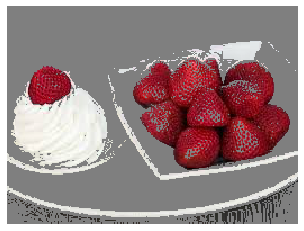

In [67]:
c = np.array([244, 25, 455])/255
W = 0.2
im_slice = im
sliced = (np.abs(im[:, :, 0] - c[0]) > W/2) & (np.abs(im[:, :, 1] - c[1]) > W/2) & (np.abs(im[:, :, 2] - c[2]) > W/2)

for i in [0, 1, 2]:
    im_slice[sliced, i] = 0.5



plt.imshow(im_slice)
plt.axis('off')

Notice that while we can select a shade of red, it is diffcult to get rid of the white. White is near the center of the intensity circle, and can thus be attributed to any of the colors.

# Tone and Color Corrections

Similar to contrast corrections, you can adjust color through analogous functions. 

In [124]:
def flat_transform(x, sigma=10):
    
    return 1/(1 + np.exp(-sigma*(x-0.5)))

def flat_transform_inv(x, sigma=10):
    y = (sigma*0.5 - np.log((1/x) - 1))/sigma
    y[y<0] = 0
    y[y == np.inf] = 1
    return y

def darken(x, sigma=5):
    return np.exp(sigma*x)/np.exp(sigma)

def lighten(x, sigma=5):
    y = (np.log(x) + sigma)/sigma
    y[y<0] = 0
    y[y == np.inf] = 1
    return y

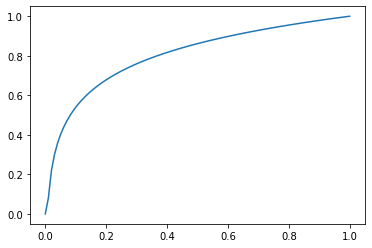

In [121]:
x = np.linspace(0.00001, 1, 101)
y = darken(x, sigma=5)

plt.plot(x, y)

C:\Users\koolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\koolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


(-0.5, 1279.5, 719.5, -0.5)

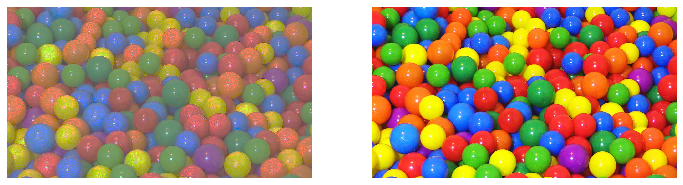

In [115]:
f = urllib.request.urlopen('https://i.ytimg.com/vi/orxXlAltFQg/maxresdefault.jpg')
im = img_as_float(plt.imread(f, format='jpeg'))
im_flat = flat_transform_inv(im, sigma=15)

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

axes[0].imshow(im_flat)
axes[0].axis('off')

axes[1].imshow(im)
axes[1].axis('off')

C:\Users\koolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


(-0.5, 1279.5, 719.5, -0.5)

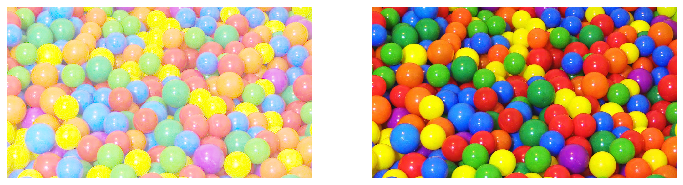

In [126]:
f = urllib.request.urlopen('https://i.ytimg.com/vi/orxXlAltFQg/maxresdefault.jpg')
im = img_as_float(plt.imread(f, format='jpeg'))
im_light = lighten(im, sigma=5)

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

axes[0].imshow(im_light)
axes[0].axis('off')

axes[1].imshow(im)
axes[1].axis('off')

You can correct colors similarly by only modifying the R, G, or B components.

C:\Users\koolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


(-0.5, 1279.5, 719.5, -0.5)

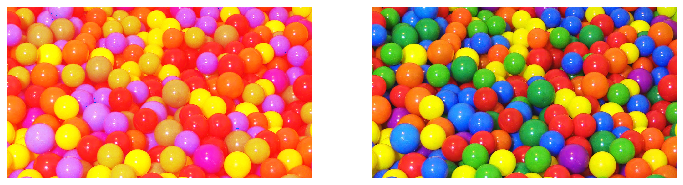

In [139]:
f = urllib.request.urlopen('https://i.ytimg.com/vi/orxXlAltFQg/maxresdefault.jpg')
im = img_as_float(plt.imread(f, format='jpeg'))
f = urllib.request.urlopen('https://i.ytimg.com/vi/orxXlAltFQg/maxresdefault.jpg')
im_redoff = img_as_float(plt.imread(f, format='jpeg'))
f = urllib.request.urlopen('https://i.ytimg.com/vi/orxXlAltFQg/maxresdefault.jpg')
im_fixed = img_as_float(plt.imread(f, format='jpeg'))

im_redoff[:, :, 0] = lighten(im[:, :, 0], sigma=20)
im_fixed[:, :, 0] = darken(im_redoff[:, :, 0], sigma=20)

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

axes[0].imshow(im_redoff)
axes[0].axis('off')

axes[1].imshow(im_fixed)
axes[1].axis('off')